# Apply Regression Methods on House Prices Prediction(Part 2)

# 3. Regression Modeling

## Introduction
Regression is a very useful and important machine learning method, because it is easy to interpret the relationship between target variable and independent variables. In section 3, I implement various of regression methods to predict the continuous variable(house price) using multiple features, we will consider about the model complexity and the method to do feature selection using cross-validation technique. 

In [1]:
import scipy
import pandas as pd# Pandas is an easy-to-use data structures and data analysis tools
import numpy as np# NumPy is the fundamental package for scientific computing
import seaborn as sns# Seaborn is a visualization library based on matplotlib (attractive statistical graphics).
import matplotlib.pyplot as plt # Matplotlib is a python 2D plotting library
import csv
import warnings
warnings.filterwarnings('ignore') # To ignore some of seaborn warning msg

from sklearn.model_selection import train_test_split
from sklearn import linear_model# Scikit learn library that implements generalized linear models
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics.regression import r2_score
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors

from sklearn.linear_model import Ridge

%matplotlib notebook

## Read and split the dataset

In [2]:
data = pd.read_csv('kc_house_data_after_data_preparation.csv')
data.shape#21610 x 20

(21610, 20)

In [3]:
data.head()

,Unnamed: 0,log(price),bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,days_distance,log_sqft_lot,log_sqft_lot15
0,0,5.346157,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,164,8.639411,8.639411
1,1,5.730782,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1,47.7210,-122.319,1690,221,8.887653,8.941022
2,2,5.255273,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,299,9.210340,8.994917
3,3,5.781037,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,221,8.517193,8.517193
4,4,5.707570,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,292,8.997147,8.923058


In [4]:
data.dtypes

Unnamed: 0          int64
log(price)        float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
lat               float64
long              float64
sqft_living15       int64
days_distance       int64
log_sqft_lot      float64
log_sqft_lot15    float64
dtype: object

In [5]:
data = data.drop(['Unnamed: 0'],axis = 1)

In [6]:
# Create resudual plots
#IndexList = data.dtypes.index.tolist()[1:]
#fig, axarr = plt.subplots(len(IndexList),1,figsize=(8,4))
#for n in range(0,len(IndexList)):
    #sns.residplot(x = IndexList[n],y = 'log(price)',data=data, lowess=True, color="g",ax=axarr[n])
    #plt.show()

In [7]:
#http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/

<IPython.core.display.Javascript object>


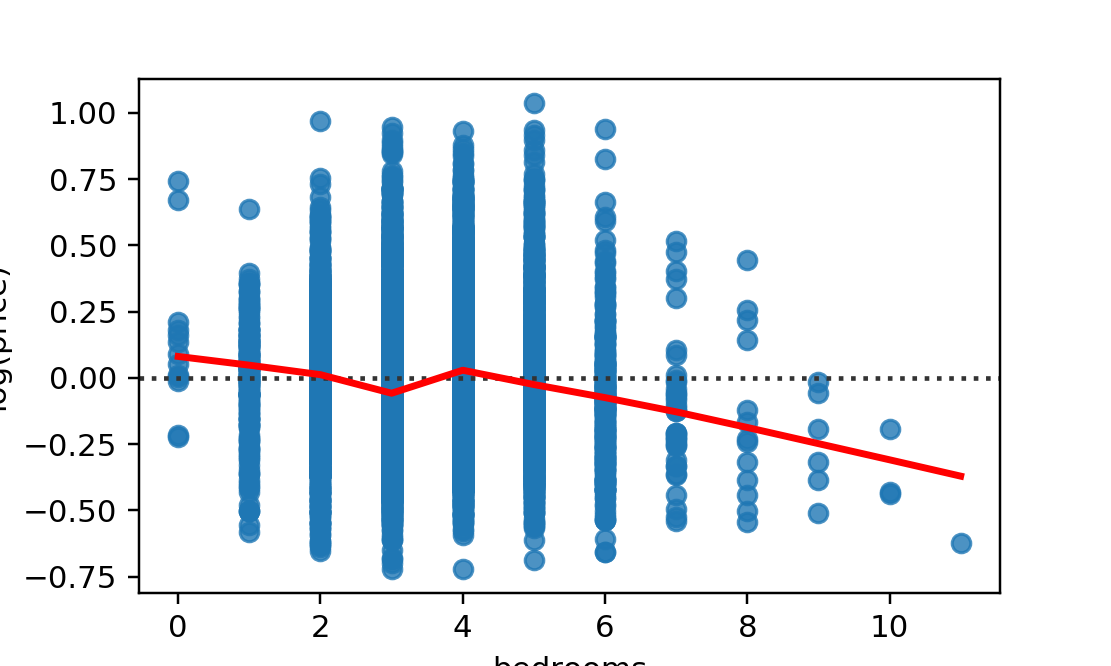

<IPython.core.display.Javascript object>


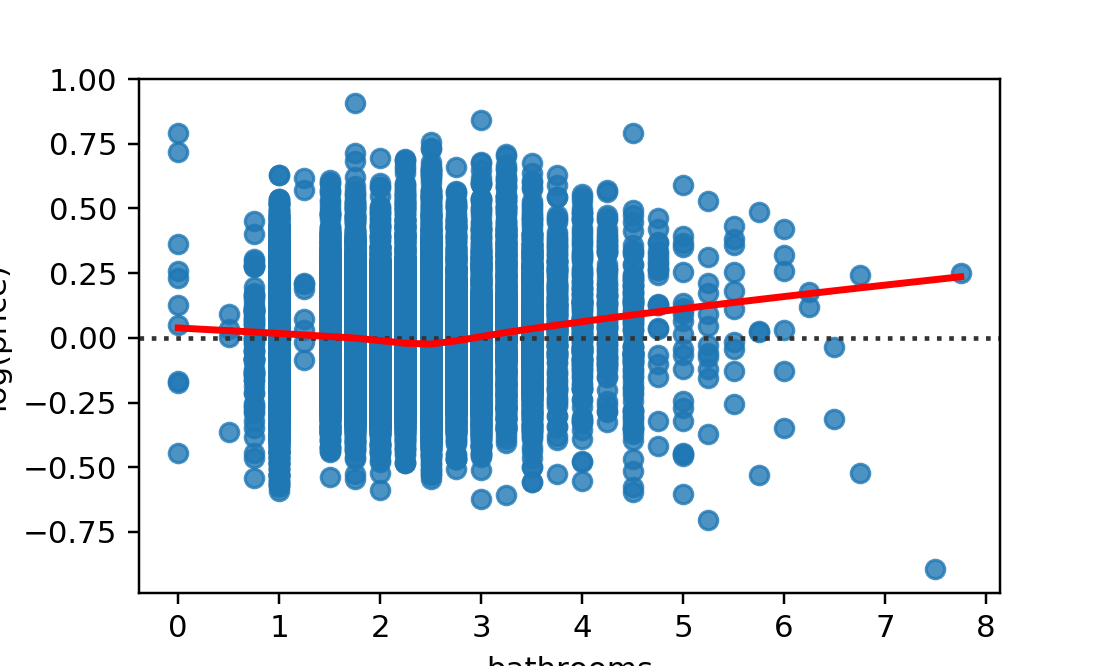

<IPython.core.display.Javascript object>


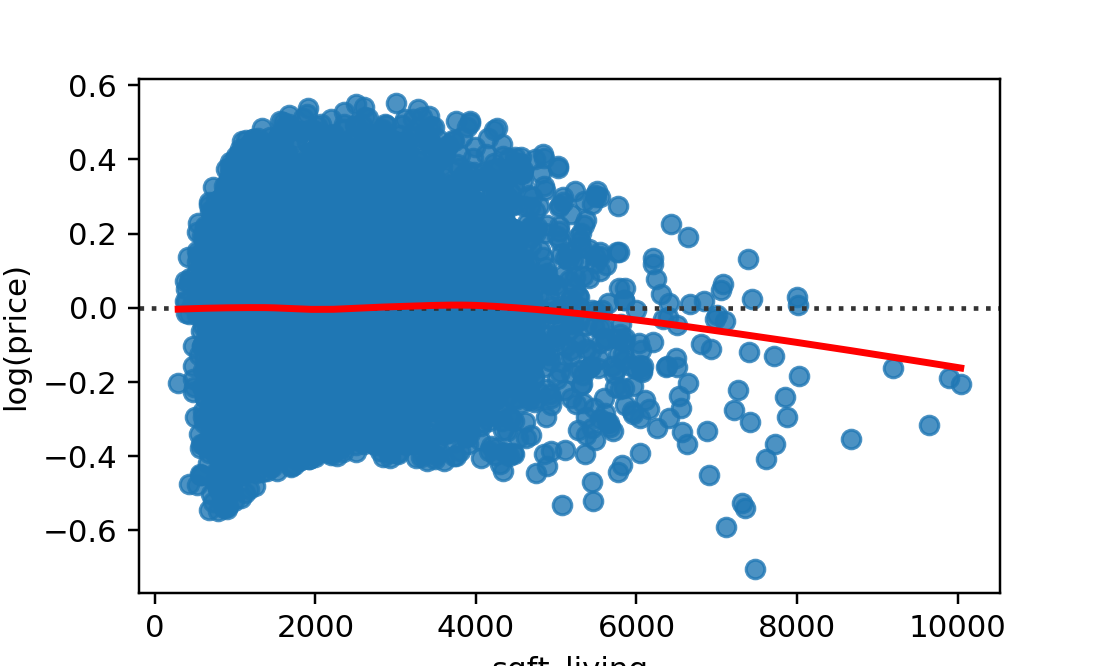

<IPython.core.display.Javascript object>


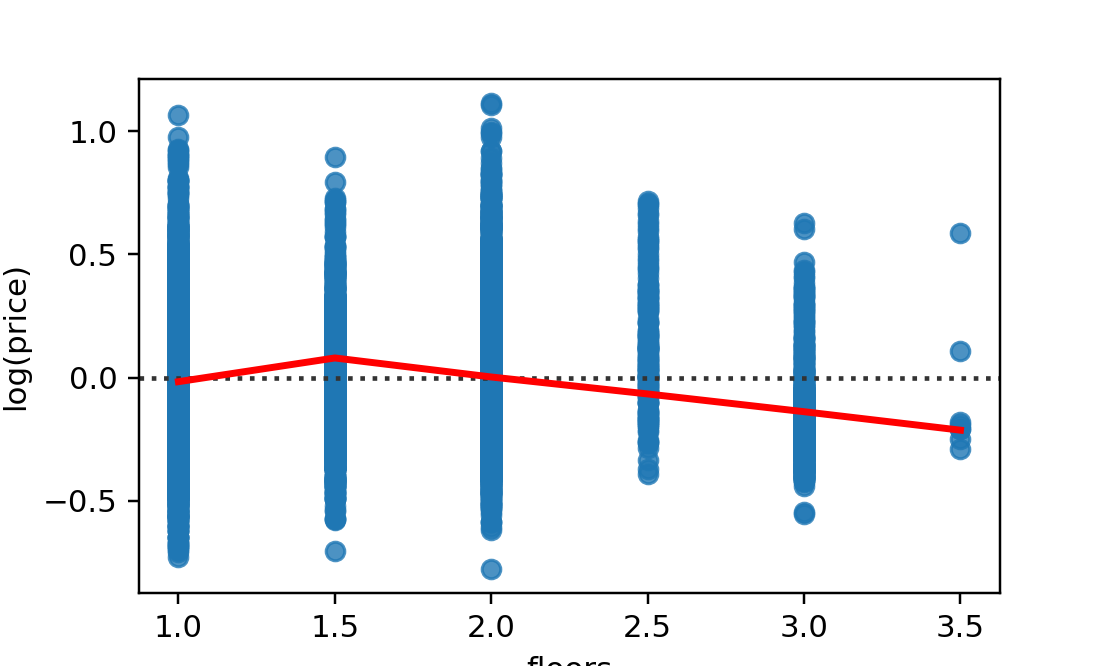

<IPython.core.display.Javascript object>


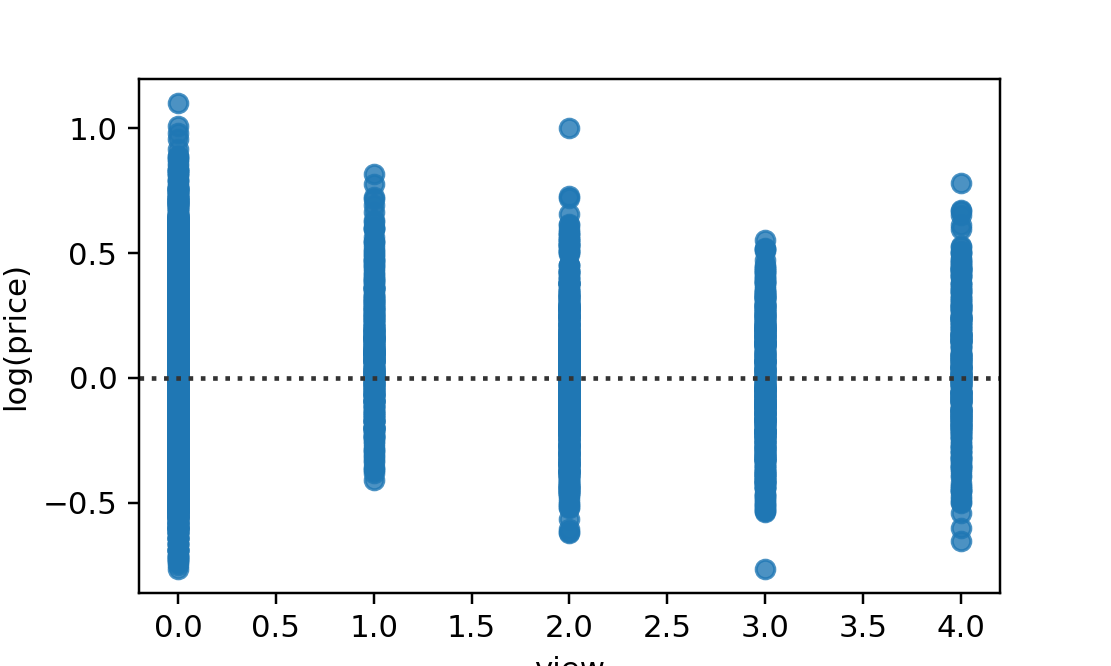

<IPython.core.display.Javascript object>


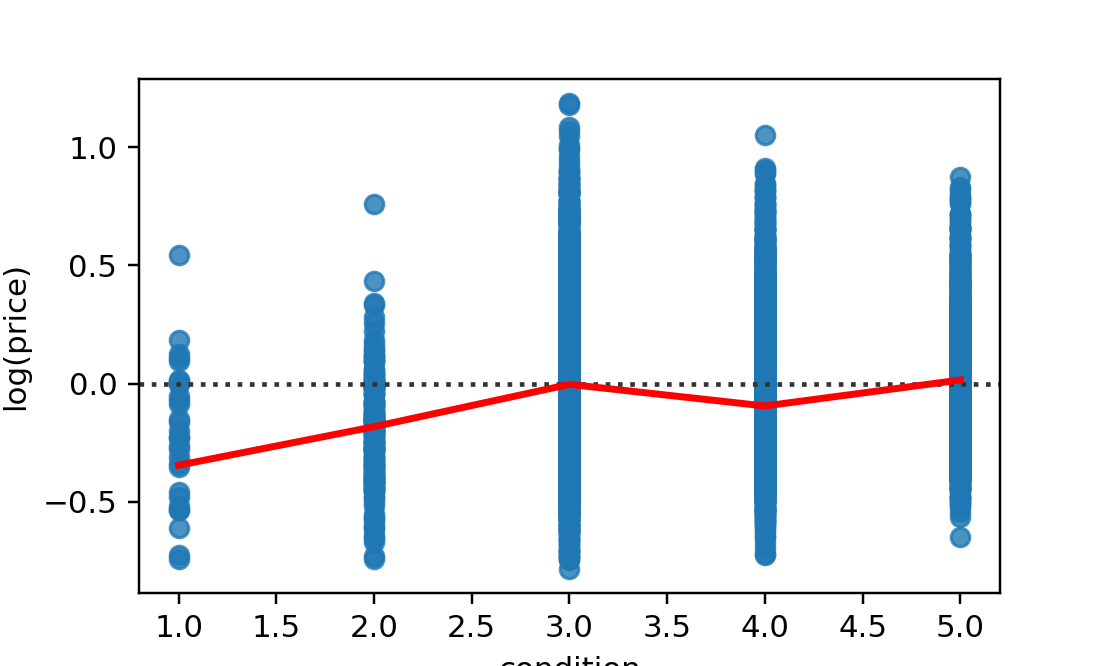

<IPython.core.display.Javascript object>


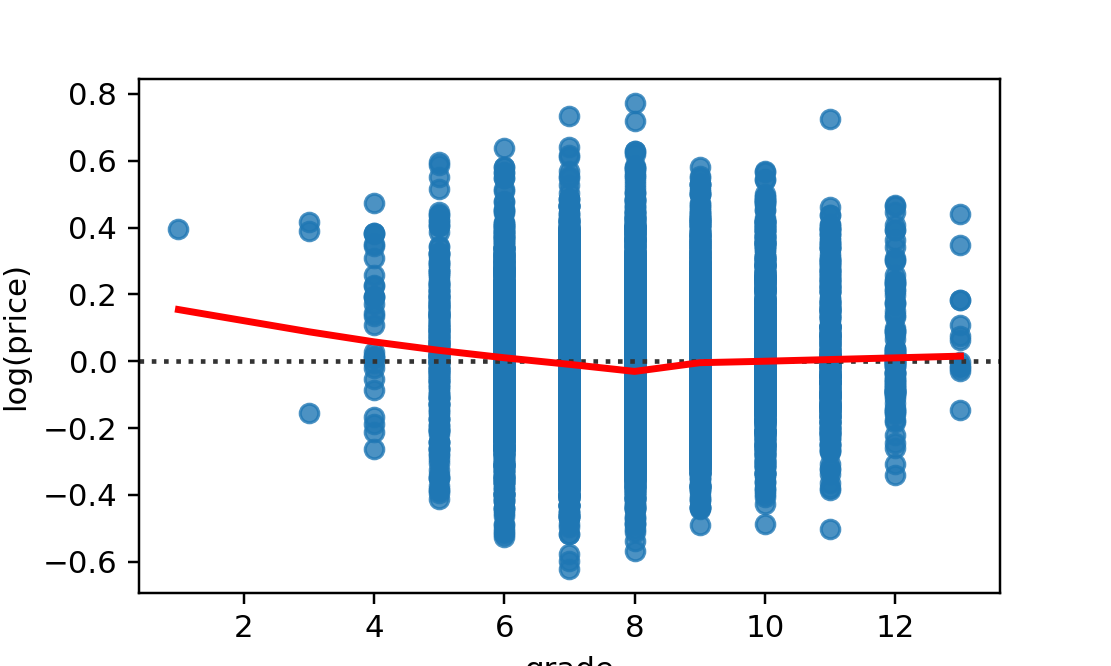

<IPython.core.display.Javascript object>


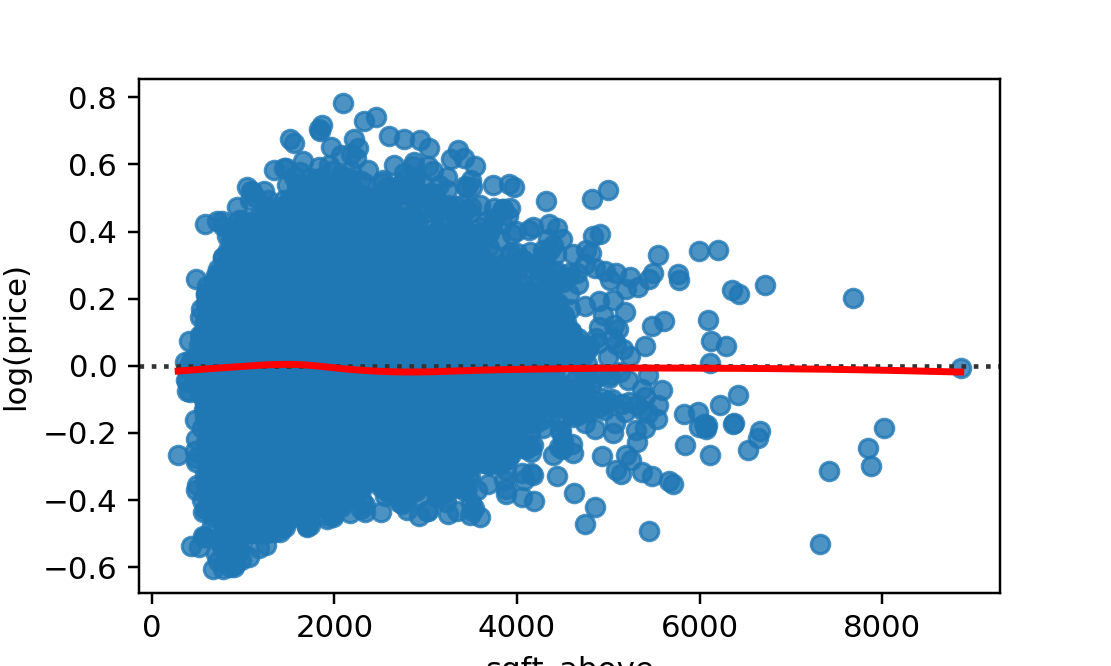

<IPython.core.display.Javascript object>


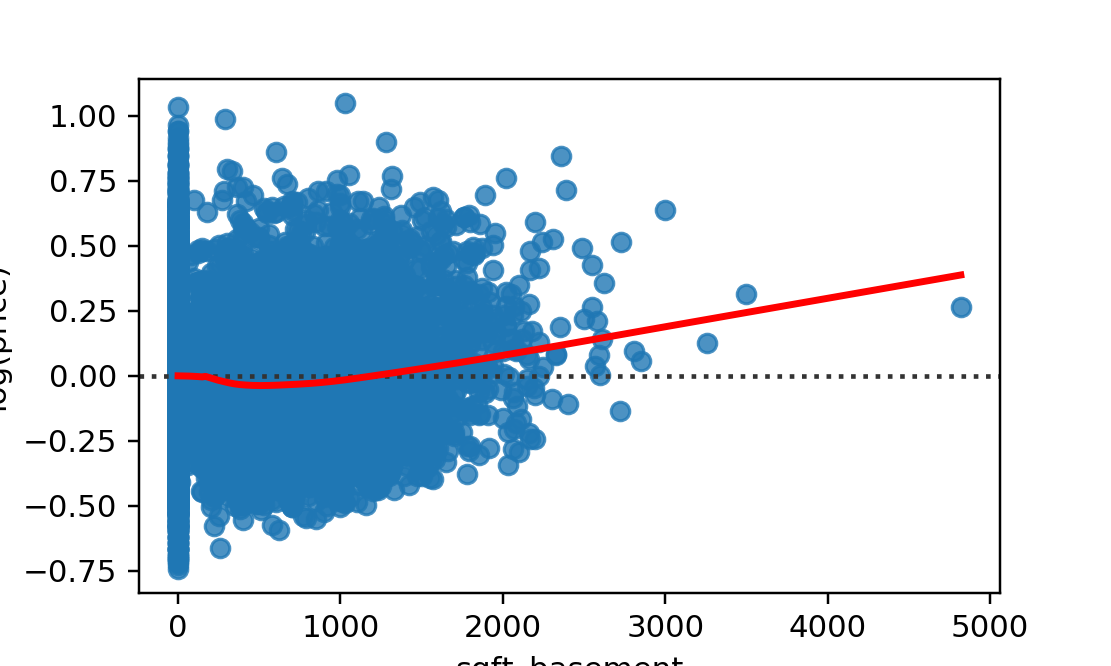

<IPython.core.display.Javascript object>


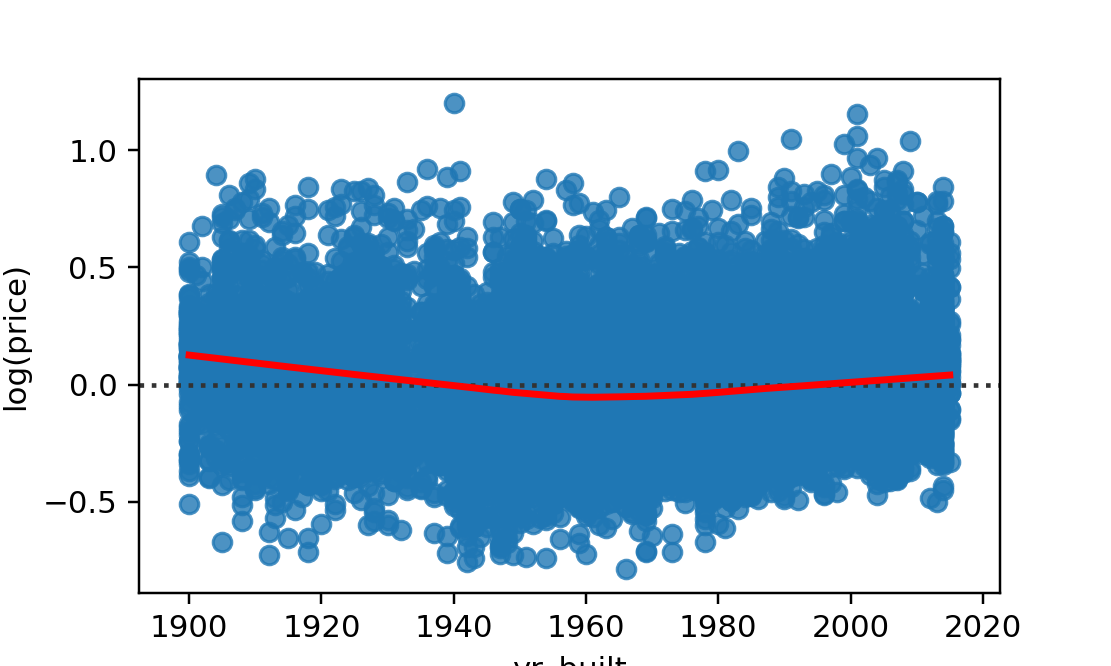

<IPython.core.display.Javascript object>


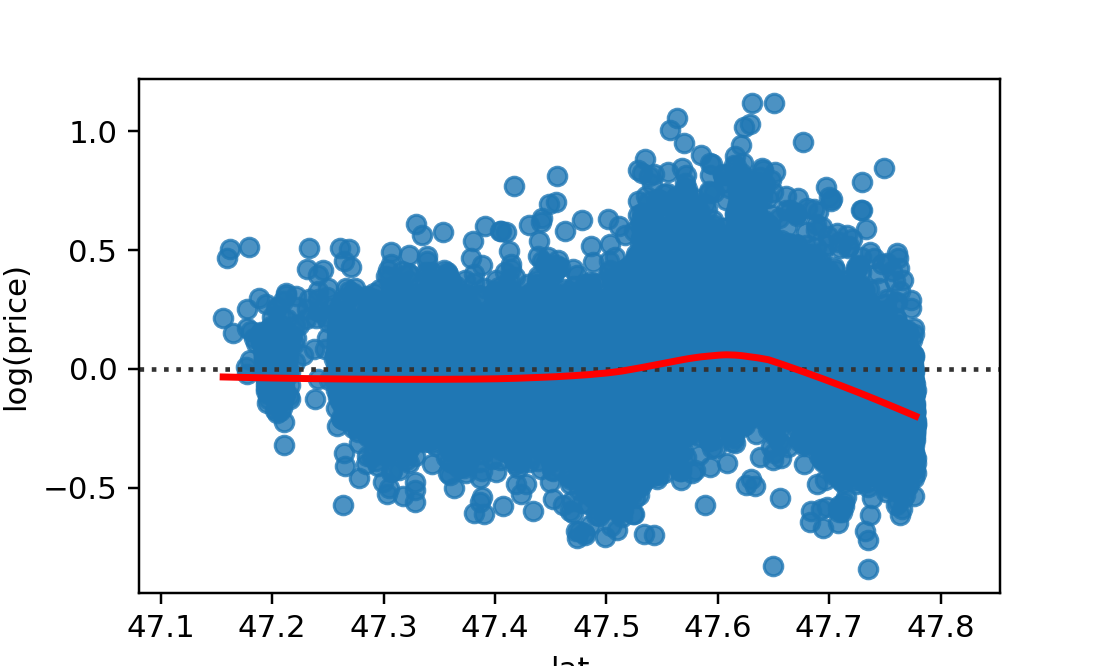

<IPython.core.display.Javascript object>


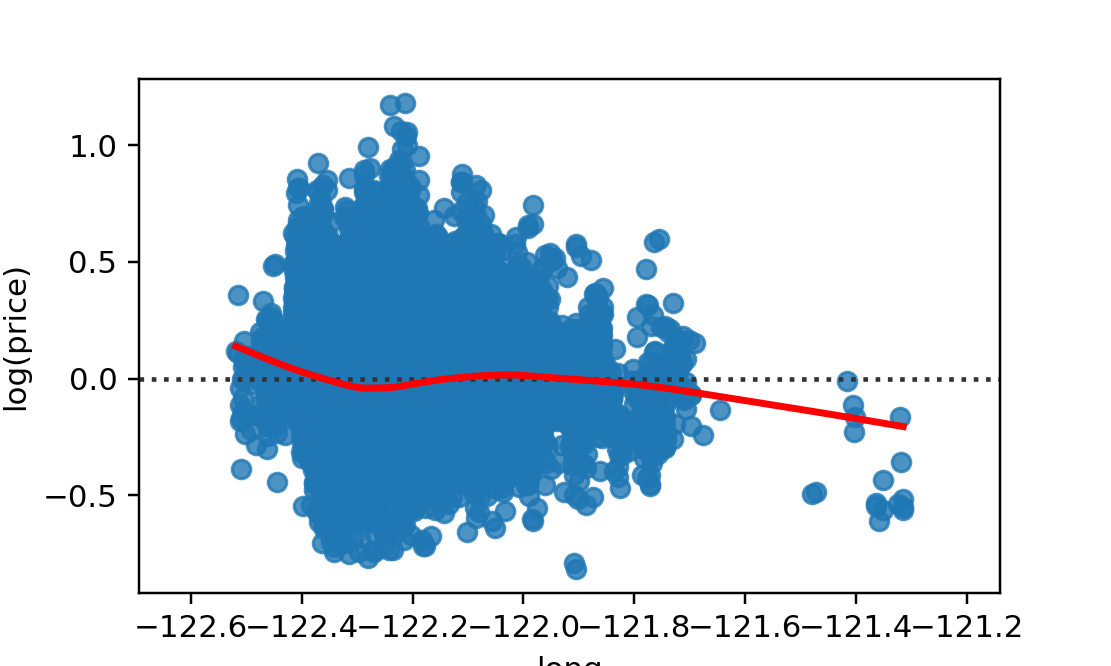

<IPython.core.display.Javascript object>


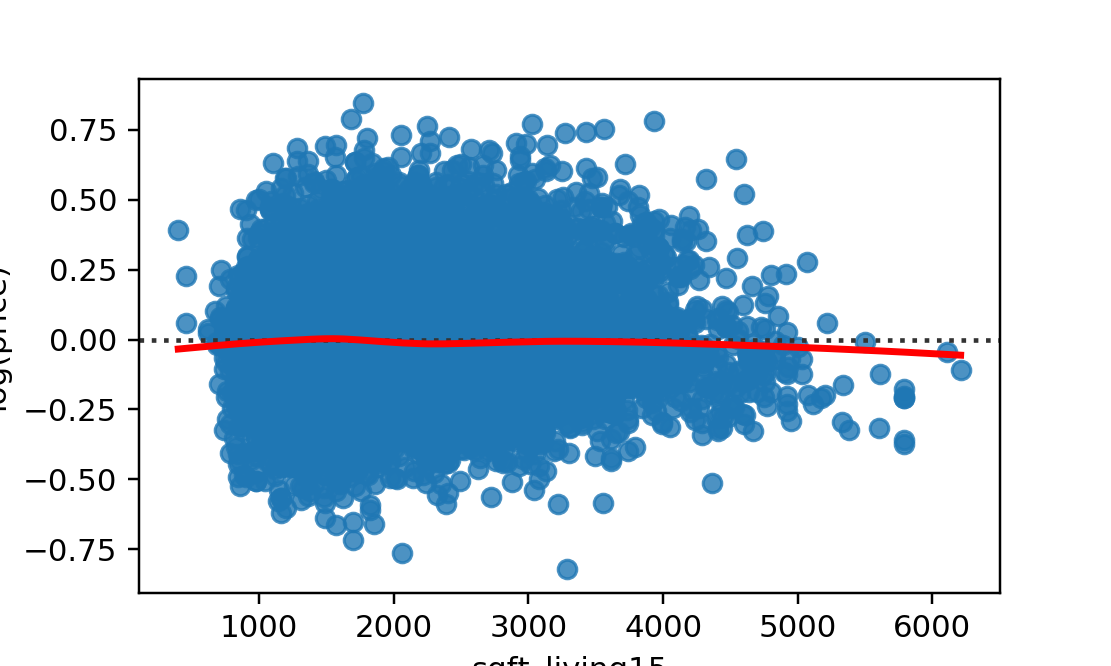

<IPython.core.display.Javascript object>


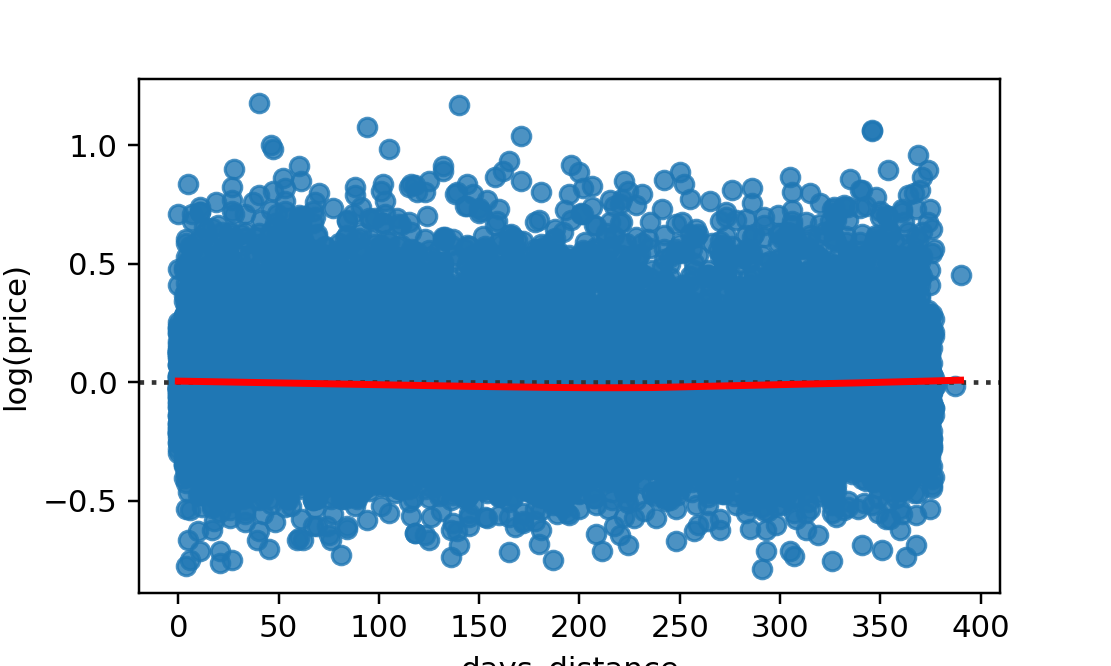

<IPython.core.display.Javascript object>


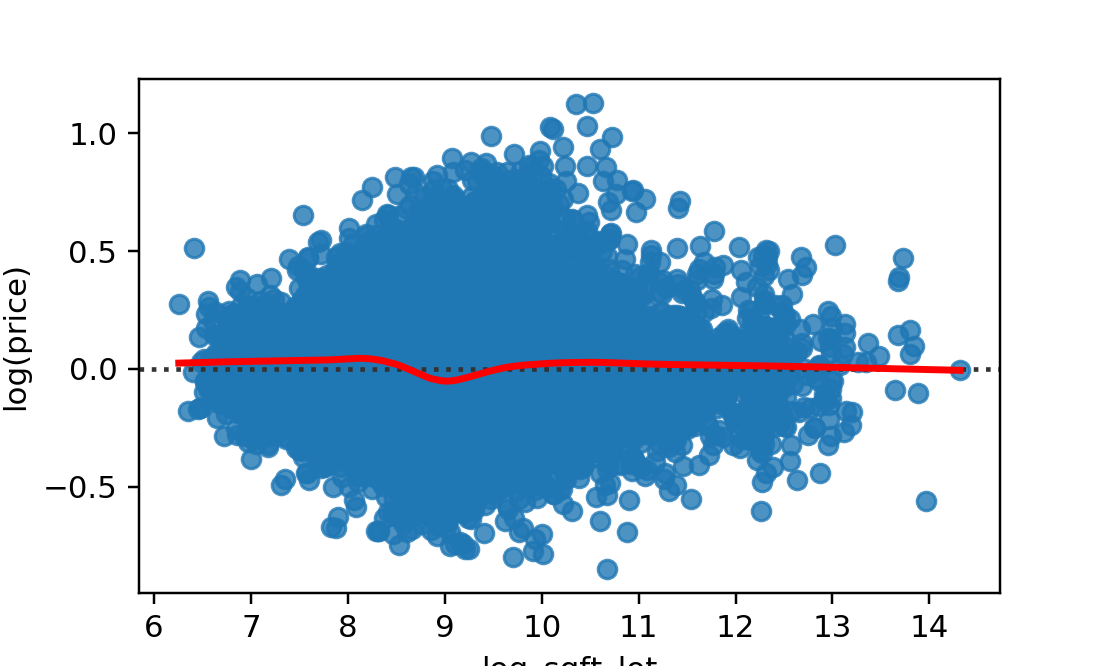

<IPython.core.display.Javascript object>


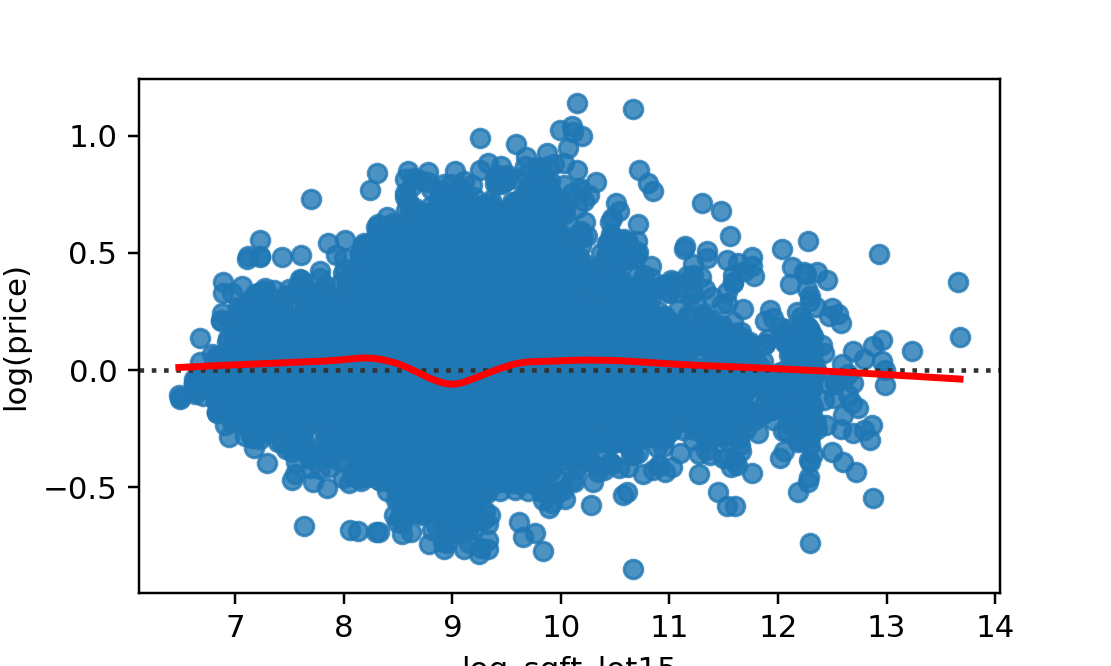

In [86]:
plt.subplots(figsize=(5,3))
sns.residplot(x = 'bedrooms',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'bathrooms',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'sqft_living',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'floors',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'view',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'condition',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'grade',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'sqft_above',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'sqft_basement',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'yr_built',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'lat',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'long',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'sqft_living15',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'days_distance',y = 'log(price)',data=data, lowess=True ,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'log_sqft_lot',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

plt.subplots(figsize=(5,3))
sns.residplot(x = 'log_sqft_lot15',y = 'log(price)',data=data, lowess=True,line_kws={'color':'r'})

In [112]:
# Create dummy variables for categorical features
categorial_cols = ['waterfront', 'yr_renovated']

for cc in categorial_cols:
    dummies = pd.get_dummies(data[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    data.drop(cc, axis=1, inplace=True)
    data = data.join(dummies)
data.dtypes

log(price)        float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
floors            float64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
lat               float64
long              float64
sqft_living15       int64
days_distance       int64
log_sqft_lot      float64
log_sqft_lot15    float64
waterfront#0        uint8
waterfront#1        uint8
yr_renovated#0      uint8
yr_renovated#1      uint8
dtype: object

In [8]:
traindata, testdata = train_test_split(data, random_state=0,train_size = 0.8)

## 3.1 Multiple Regression
Let's firstly apply multiple linear regression. 

As we know, if we just use one dataset to learn the parameters and do the prediction using the same dataset, as the model complexity increases, the training error(RMSE) will decreases quite significantly and close to 0. However, if we apply this model on some new set, the prediction will be very bad.

To solve this problem and prevent overfitting, I will split the data into training set and test set, train the parameters of the models in the training set and do prediction and evaluation in the test set by calculating the root mean square error(RMSE). RMSE smaller, the model better. But in test set, the RMSE is a curve, it decrease at first and increase after that. If the data complexity is very high, the RMSE will be very high as well. So splitting will help us deal with overfitting.

<img src="overfitting.png">

To measure the accuracy of regression models we use the R2 and adjusted R2. 
R2 = 1-RSS/TSS. 
The RSS (Residual sum of squares) measures the variability left unexplained after performing the regression.
The TSS measues the total variance in Y.
R2 measures proportion of variability in Y that is explained by X using our model.
R2 closer to 1, the model better. By comparing the metric(RMSE) and r square of several models we will know which model will be better.

The R2 increases when the number of features increase. Because of this, sometimes a more robust evaluator is preferred to compare the performance between different models. This evaluater is called adjusted R2 and it only increases, if the addition of the variable reduces the MSE. So we will also show the adjuested R2 results.

In [9]:
#def adjustedR2(r2,n,k):
#    return r2-(k-1)/(n-k)*(1-r2)
##n is the number of observations and k is the number of parameters

def multiple_regression(train,test,featuresSelected):
    regression = linear_model.LinearRegression()
    
    # train the parameters in training set
    regression.fit(train.as_matrix(columns = featuresSelected),train.as_matrix(columns = ['log(price)']))

    test_y = test.as_matrix(columns = ['log(price)'])
    exp_test_y = np.exp(test_y)
    test_X = test.as_matrix(columns = featuresSelected)
    
    exp_pred = np.exp(regression.predict(test_X))
    # do prediction and calculate MSE, R square and adjusted r square in the test set
    #Predction = regression.predict(test.as_matrix(columns = featuresSelected))
    #RSS = ((Predction - test.as_matrix(columns = ['log(price)']) ** 2).sum())
    #MSE= RSS/n
    #RMSE = sqrt(MSE)
    
    
    RMSE = np.sqrt(metrics.mean_squared_error(exp_test_y, exp_pred))
    SS_Residual = sum((exp_test_y-exp_pred)**2)
    SS_Total = sum((exp_test_y-np.mean(exp_test_y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(exp_test_y)-1)/(len(exp_test_y)-test_X.shape[1]-1)

#    Rsquare_train = regression.score(train.as_matrix(columns = featuresSelected),
#                                            train.as_matrix(columns = ['log(price)']))
#    AdjustedRsquare_train = adjustedR2(regression.score(train.as_matrix(columns = featuresSelected),
#                                            train.as_matrix(columns = ['log(price)'])),
#                                              train.shape[0],len(featuresSelected))
#    Rsquare_test = regression.score(test.as_matrix(columns = featuresSelected),
#                                            test.as_matrix(columns = ['log(price)']))
#    AdjustedRsquare_test = adjustedR2(regression.score(test.as_matrix(columns = featuresSelected),
#                                            test.as_matrix(columns = ['log(price)'])),
#                                             test.shape[0],len(featuresSelected))
#    return RMSE,Rsquare_train,AdjustedRsquare_train,Rsquare_test,AdjustedRsquare_test,regression.intercept_[0],regression.coef_
    return RMSE,r_squared,adjusted_r_squared,regression.intercept_,regression.coef_
    

In [10]:
data.corr()['log(price)'].sort_values(ascending=False)

log(price)        1.000000
grade             0.703192
sqft_living       0.695961
sqft_living15     0.618974
sqft_above        0.601171
bathrooms         0.549833
lat               0.449328
bedrooms          0.350233
view              0.345554
sqft_basement     0.315168
floors            0.310093
waterfront        0.174776
log_sqft_lot      0.137011
log_sqft_lot15    0.122559
yr_renovated      0.113143
yr_built          0.081139
long              0.049979
condition         0.039394
days_distance    -0.005447
Name: log(price), dtype: float64

In [11]:
FeatureOrder = data.corr()['log(price)'].sort_values(ascending=False).index.tolist()[1:]

From the sorted correlation above, in the future we can add variables one by one and plot the R2 of these models.
Firstly, let's see some models as examples:

### *model1: Log(price) ~  'sqft_living'+'sqft_living15'+'grade'+'sqft_above'+'bathrooms'
based on the correlation plot, we choose 5 variables to fit the model

In [12]:
feature1 = ['sqft_living','sqft_living15','grade','sqft_above','bathrooms'] 

rmse,rsquare,Adrsquare,inte,coef, = multiple_regression(traindata,testdata,feature1)
#print("RSS is",(rmse**2) * testdata.shape[0])
print("RMSE is ",rmse)
print("R^2 in test set is ",rsquare)
print("Adjuested R^2 in test set is ",Adrsquare)
print("intercept: ",inte)
#print('coeficients: ', coef)
coeff_df = pd.DataFrame(coef.tolist()[0],feature1, columns=['Coefficient'])  
coeff_df 

RMSE is  46.117238368526905
R^2 in test set is  [0.5895266]
Adjuested R^2 in test set is  [0.58905108]
intercept:  [4.82454703]


,Coefficient
sqft_living,0.000123
sqft_living15,0.000039
grade,0.081821
sqft_above,-0.000062
bathrooms,-0.002731


### *model2: Log(price) ~ 'sqft_living'+'sqft_living15'+'grade'+'sqft_above'+'bathrooms'+'lat'

In [13]:
feature2 = ['sqft_living','sqft_living15','grade','sqft_above','bathrooms','lat']

rmse,rsquare,Adrsquare,inte,coef, = multiple_regression(traindata,testdata,feature2)
#print("RSS is",(rmse**2) * testdata.shape[0])
print("RMSE is ",rmse)
print("R^2 in test set is ",rsquare)
print("Adjuested R^2 in test set is ",Adrsquare)
print("intercept: ",inte)
#print('coeficients: ', coef)
coeff_df = pd.DataFrame(coef.tolist()[0],feature2, columns=['Coefficient'])  
coeff_df 

RMSE is  39.27329970925119
R^2 in test set is  [0.70231756]
Adjuested R^2 in test set is  [0.70190363]
intercept:  [-24.92550218]


,Coefficient
sqft_living,0.000107
sqft_living15,0.000041
grade,0.062528
sqft_above,-0.000033
bathrooms,0.005367
lat,0.627778


### *model3: Log(price) ~  all variables

In [14]:
FeatureOrder = data.corr()['log(price)'].sort_values(ascending=False).index.tolist()[1:]
feature3 = FeatureOrder
rmse,rsquare,Adrsquare,inte,coef, = multiple_regression(traindata,testdata,feature3)
#print("RSS is",(rmse**2) * testdata.shape[0])
print("RMSE is ",rmse)
print("R^2 in test set is ",rsquare)
print("Adjuested R^2 in test set is ",Adrsquare)
print("intercept: ",inte)
#print('coeficients: ', coef)
coeff_df = pd.DataFrame(coef.tolist()[0],feature3, columns=['Coefficient'])  
coeff_df 

RMSE is  34.29862435964974
R^2 in test set is  [0.77295506]
Adjuested R^2 in test set is  [0.7720053]
intercept:  [-19.86148395]


,Coefficient
grade,0.068587
sqft_living,0.000044
sqft_living15,0.000048
sqft_above,0.000021
bathrooms,0.030201
lat,0.576855
bedrooms,-0.006872
view,0.024613
sqft_basement,0.000023
floors,0.023168


Comparing with 3 models above, the MSE is decreasing and R2 is increasing since the model complexity is growing. How to select the features and how many features to select, it will be a problem. If the model complexity is higher and higher, the model will be overfitting the data. 

## 3.2 Polynomial Regression

In residual versis fitted plots shown, we find there are some curves between 'log(price)' and independent variables, such as 'bedrooms' and 'sqft_living'. We should add some polynomial features in the model.

### *model1': Log(price) ~ all variables + 'bedrooms' ^2

In [15]:
#FeatureOrder = data.corr()['log(price)'].sort_values(ascending=False).index.tolist()[1:]
data = pd.read_csv('kc_house_data_after_data_preparation.csv')
data.shape#21610 x 20
# Create dummy variables for categorical variables
categorial_cols = ['waterfront', 'yr_renovated']

for cc in categorial_cols:
    dummies = pd.get_dummies(data[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    data.drop(cc, axis=1, inplace=True)
    data = data.join(dummies)

data['bedrooms_square'] = data['bedrooms'] **2
data = data.drop(["Unnamed: 0"],axis = 1)
traindata, testdata = train_test_split(data, random_state=0,train_size = 0.8)

data.dtypes.index

Index(['log(price)', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living15', 'days_distance', 'log_sqft_lot',
       'log_sqft_lot15', 'waterfront#0', 'waterfront#1', 'yr_renovated#0',
       'yr_renovated#1', 'bedrooms_square'],
      dtype='object')

In [17]:
feature4 = ['sqft_living','sqft_living15','grade','sqft_above','bathrooms', 'bedrooms_square']
rmse,rsquare,Adrsquare,inte,coef, = multiple_regression(traindata,testdata,feature4)
#print("RSS is",(rmse**2) * testdata.shape[0])
print("RMSE is ",rmse)
print("R^2 in test set is ",rsquare)
print("Adjuested R^2 in test set is ",Adrsquare)
print("intercept: ",inte)
#print('coeficients: ', coef)
coeff_df = pd.DataFrame(coef.tolist()[0],feature4, columns=['Coefficient'])  
coeff_df 

RMSE is  46.13600918695651
R^2 in test set is  [0.58919239]
Adjuested R^2 in test set is  [0.58862116]
intercept:  [4.83458504]


,Coefficient
sqft_living,0.000128
sqft_living15,0.000038
grade,0.080402
sqft_above,-0.000063
bathrooms,-0.000806
bedrooms_square,-0.000907


Polynomial regression is quite similar as multiple regression, we split dataset into training set and test set, train parameters in the training set, do prediction and evaluation in the test set. The metric is still MSE, R2 and adjusted R2.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [23]:
data = pd.read_csv('kc_house_data_after_data_preparation.csv')
data.shape#21610 x 20
# Create dummy variables for categorical variables
categorial_cols = ['waterfront', 'yr_renovated']

for cc in categorial_cols:
    dummies = pd.get_dummies(data[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    data.drop(cc, axis=1, inplace=True)
    data = data.join(dummies)

data = data.drop(["Unnamed: 0"],axis = 1)
traindata, testdata = train_test_split(data, random_state=0,train_size = 0.8)

In [24]:
def polynomial_regression(train,test,featuresSelected,Degree):
    poly = PolynomialFeatures(degree=Degree)
    X_train_poly = poly.fit_transform(train.as_matrix(columns = featuresSelected))
    X_test_poly = poly.fit_transform(test.as_matrix(columns = featuresSelected))
    polyregression = linear_model.LinearRegression().fit(X_train_poly, train.as_matrix(columns = ['log(price)']))
    exp_pred = np.exp(polyregression.predict(X_test_poly))
    
    test_y = test.as_matrix(columns = ['log(price)'])
    exp_test_y = np.exp(test_y)
    test_X = X_train_poly
    
    RMSEpoly = np.sqrt(metrics.mean_squared_error(exp_test_y, exp_pred))
    SS_Residual = sum((exp_test_y-exp_pred)**2)
    SS_Total = sum((exp_test_y-np.mean(exp_test_y))**2)
    R2Testpoly = 1 - (float(SS_Residual))/SS_Total
    return Degree,RMSEpoly,R2Testpoly,polyregression.intercept_,polyregression.coef_


### *model1: Log(price) ~ all variables(degree 2)

In [34]:
FeatureOrder = data.corr()['log(price)'].sort_values(ascending=False).index.tolist()[1:]
feature = FeatureOrder
D,rmse,rsquaret,inte,coef = polynomial_regression(traindata,testdata,feature,2)
print("degree = ", D)
print("RSS is",(rmse**2) * testdata.shape[0])
print("RMSE is ",rmse)
print("R^2 in test set is ",rsquaret)
print("intercept: ",inte)
#print('coeficients: ', coef)

degree =  2
RSS is 3803800.1990631996
RMSE is  29.666510593228825
R^2 in test set is  [0.8301399]
intercept:  [-3045.00681876]


### *model2: Log(price) ~ all variables(degree 3) 

In [27]:
#FeatureOrder = data.corr()['log(price)'].sort_values(ascending=False).index.tolist()[1:]
feature = FeatureOrder
D,rmse,rsquaret,inte,coef = polynomial_regression(traindata,testdata,feature,3)
print("degree = ", D)
print("RSS is",(rmse**2) * testdata.shape[0])
print("RMSE is ",rmse)
print("R^2 in test set is ",rsquaret)
print("intercept: ",inte)
#print('coeficients: ', coef)

degree =  3
RSS is 2.514959543873322e+44
RMSE is  2.4122544729909576e+20
R^2 in test set is  [-1.12306443e+37]
intercept:  [16980.66507129]


From model 2 result, we can see that additional of many polynomial features often lead to overfitting, which means the model fits the training set so well, but fits very bad in the test set. The RMSE in model2 is much larger than RMSE in model 1 and the R2 in the test set is wield. To deal with overfitting, we will use polynomial features with regularization penalty: Ridge Regression and LASSO, to start with all possible features and shrink the coefficients.

## 3.3 Ridge Regression

Regularization is a way to prevent over-fitting and improve the likely generalization performance of a model by restricting the models possible parameter settings. Usually the effect of restriction from regularization is to reduce the complexity of the final estimated model. We use regularization to solve overfitting problem by balancing both the measure of fit and measure of magnitude of coefficient. How to measure the magnitude of coefficient? we can choose sum of absolute value(L1-norm), sum of squared coefficient(L2-norm) or combination of L1-norm and L2-norm.

If we use L2-norm to regularize the solution to the old objective that we had, the method is called Ridge Regression. 

#### The goal of Ridge Regression is to find estimated coefficients to minimize the equation as follows and penalize fits with large coefficients.
<center><img src="ridgeregressionequation.png" width="350"><center>

Lambda is called tuning parameter which balance the fit and magnitude. Larger Lambda means more regularization.
* If Lambda = 0
<center>The objective becomes same as original regression<center>
<center>Estimated coefficients  = least squared solution of original regression<center>

* If Lambda = infinity
<center>Estimated coefficients  = 0 i.e.Total Cost = RSS(0)<center>

* If lambda in between
<center>The coefficients will be somewhere between 0 and ones for simple linear regression<center>

### Feature Preparation and Normalization
As we know, the effect of increasing Lambda to shrink the AW coefficients towards 0 and towards each other, but if the input variables have different scares, then when this shrinkage happens of the coefficients, input variables with different scales will have different contributions to this L2 penalty.
Transform the input features to make them on the same scale before ridge regression is a good idea. After normalization, the ridge penalty will apply more fairly to all features.
In machine learning techniques, normalization should be used not only on regularized regression but also KNN, SVM, Neural Network and so on.

In Python, parameter in linear_model.Ridge() which is called 'normalize = True' will implement normalization on input features for us.

### How to pick an optimal Lambda: K-Fold Cross-validation & Leave-one-out Cross-validation
If we just split original training set into a training set and a validation set, fit parameters in the training set, test performance of parameters to select lambda and assess the performance of the selected model on our test set, it seems that if the dataset is not large enough, it will leave not enough data for training to split data into training/validation/test parts.


#### To solve this problem, we consider to use K-Fold Cross-validation:

Step1: Split dataset into Nontest set and test set.

Step2: Randomly assign Nontest set into K groups equally. Each time, we use one of K groups as validation set, treat all the remaining data left in Nontest set as training set.

Step3: For every value of lambda, we do a procedure as follows: For i from 1 to K, estimate parameters in the training set, compute error in the validation set. Calculate error_CV as the mean of these K error for this particular lambda. 
<img src="K-foldCV.png" width=350>
Repeat this procedure for each choice of lambda, we will have many errors based on different lambda. So we choose the lambda which minimizes the error_CV.

Step4: Using the Lambda selected and the test set, we can do prediction and evaluation.

#### Leave-one-out Cross-valivation
Whick K will be a good choice? Fomally, the best approximation occurs for validation sets of size 1(K=N,N is the number of rows in Nontest set).

We can do this using the cross-validated ridge regression function, RidgeCV(). By default, the function performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the argument cv.

A note on performing cross-validation for more advanced scenarios.

In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is not to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data (see the lecture on data leakage later in the course). Instead, scaling/normalizing must be computed and applied for each cross-validation fold separately. To do this, the easiest way in scikit-learn is to use pipelines. While these are beyond the scope of this course, further information is available in the scikit-learn documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

or the Pipeline section in the recommended textbook: Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O'Reilly Media).


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('kc_house_data_after_data_preparation.csv')
data.shape#21610 x 20
# Create dummy variables for categorical variables
categorial_cols = ['waterfront', 'yr_renovated']

for cc in categorial_cols:
    dummies = pd.get_dummies(data[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    data.drop(cc, axis=1, inplace=True)
    data = data.join(dummies)
data = data.drop(["Unnamed: 0"],axis = 1)
data.dtypes.index

traindata, testdata = train_test_split(data, random_state=0,train_size = 0.8)

In [38]:
#def Ridge(train_X,train,test_X,test,featuresSelected,Lambda,Fold_Num):
#    ridgeCV = linear_model.RidgeCV(alphas = Lambda, normalize = True, cv = Fold_Num) # initialize the model
#    ridgeCV.fit(train_X, train.as_matrix(columns = ['log(price)'])) # fit the train data
    
#    Optimal_Lambda = ridgeCV.alpha_
#    RMSE = np.sqrt(mean_squared_error(test.as_matrix(columns = ['log(price)']), 
#                                                     ridgeCV.predict(test_X)))
#    R2 = ridgeCV.score(test_X, test.as_matrix(columns = ['log(price)']))
#    return Optimal_Lambda,RMSE,R2

In [41]:
# Apply 5-fold CV
feature_Poly = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living15', 'days_distance', 'log_sqft_lot',
       'log_sqft_lot15', 'waterfront#0', 'waterfront#1', 'yr_renovated#0',
       'yr_renovated#1']
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(traindata.as_matrix(columns = feature_Poly))
X_test_poly = poly.fit_transform(testdata.as_matrix(columns = feature_Poly))
#Implement LOOCV
ridgeCV = linear_model.RidgeCV(alphas = np.linspace(1.0e-100,10,num = 100), cv = 5,normalize = True) # initialize the model
ridgeCV.fit(X_train_poly, traindata.as_matrix(columns = ['log(price)'])) # fit the train data
print('best Lambda is: ' ,ridgeCV.alpha_) # get the best alpha
print('test error (RMSE) is:' ,mean_squared_error(np.exp(testdata.as_matrix(columns = ['log(price)'])), 
                                                     np.exp(ridgeCV.predict(X_test_poly)))**0.5) 
SS_Residual = sum((np.exp(testdata.as_matrix(columns = ['log(price)']))-np.exp(ridgeCV.predict(X_test_poly)))**2)
SS_Total = sum((np.exp(testdata.as_matrix(columns = ['log(price)']))-np.mean(np.exp(testdata.as_matrix(columns = ['log(price)']))))**2)
R2TestRidge = 1 - (float(SS_Residual))/SS_Total
#print('R2 is:', ridgeCV.score(X_test_poly, testdata.as_matrix(columns = ['log(price)'])))
print('R2 is:', R2TestRidge)

# From result above I confirm that poly.fit_transform() help add interaction terms as well. that's why when I create a
# new 'data' dataset with just adding squares and cubes, the RMSE is different with RMSE when I use poly.fit_transform 

best Lambda is:  0.10101010101010101
test error (RMSE) is: 33.35848936686519
R2 is: [0.7852312]


In [47]:
# Apply LOOCV
feature_Poly = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living15', 'days_distance', 'log_sqft_lot',
       'log_sqft_lot15', 'waterfront#0', 'waterfront#1', 'yr_renovated#0',
       'yr_renovated#1']
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(traindata.as_matrix(columns = feature_Poly))
X_test_poly = poly.fit_transform(testdata.as_matrix(columns = feature_Poly))
#Implement LOOCV
ridgeCV = linear_model.RidgeCV(alphas = np.linspace(1.0e-100,10,num = 100), normalize = True, store_cv_values = True) # initialize the model
ridgeCV.fit(X_train_poly, traindata.as_matrix(columns = ['log(price)'])) # fit the train data
print('best Lambda is: ' ,ridgeCV.alpha_) # get the best alpha
print('test error (RMSE) is:' ,mean_squared_error(np.exp(testdata.as_matrix(columns = ['log(price)'])), 
                                                     np.exp(ridgeCV.predict(X_test_poly)**0.5))) 
SS_Residual = sum((np.exp(testdata.as_matrix(columns = ['log(price)']))-np.exp(ridgeCV.predict(X_test_poly)))**2)
SS_Total = sum((np.exp(testdata.as_matrix(columns = ['log(price)']))-np.mean(np.exp(testdata.as_matrix(columns = ['log(price)']))))**2)
R2TestRidge = 1 - (float(SS_Residual))/SS_Total
#print('R2 is:', ridgeCV.score(X_test_poly, testdata.as_matrix(columns = ['log(price)'])))
print('R2 is:', R2TestRidge)

# From result above I confirm that poly.fit_transform() help add interaction terms as well. that's why when I create a
# new 'data' dataset with just adding squares and cubes, the RMSE is different with RMSE when I use poly.fit_transform 

best Lambda is:  0.10101010101010101
test error (RMSE) is: 86174.3230042359
R2 is: [0.7852312]


From both the 5-Fold Cross-validation and Leave-one-out Cross-validation results, we find that using all polynomial features, the best Lambda is 0.10101010101010101. Without overfitting, we get a model with RMSE which much smaller than the RMSE from original polynomial regression. Even though it is not as small as the RMSE generated by the least sqaure solution of polynomial regiression, a better R2 tells us that this model fit the data better.

## 3.4 LASSO(Least Absolute Shrinkage and Selection Operator)

In ridge regression, we penalize fits with large coefficients, shrink some coefficients towards 0 to prevent overfitting. But how about just shrink some small ridge coefficients exactly equal to zero? If so, we will do feature selection and solve the high complexity problem. LASSO give us a chance to implement this idea. We set up a threshold to pick the coefficients which are large enough.
<img src="LASSO.png" width=350>
However, if there are some coefficients which are quite close, like #bathrooms and #showers(strongly correlated features), we can ignore one and another one will be larger than the threshold.
<img src="LASSO1.png" width=350>
<img src="LASSO2.png" width=350>
In Wikipidia, LASSO is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. 

#### The goal of LASSO is to find estimated coefficients to minimize the equation as follows and lead to sparse solution by using L1-penalty
<img src="LASSOequation.png" width=350>
Lambda is called tuning parameter which balance the fit and sparsity.
* If Lambda = 0
<center>Estimated coefficients  = least squared solution of original regression<center>

* If Lambda = infinity
<center>Estimated coefficients  = 0 i.e.Total Cost = RSS(0)<center>

* If lambda in between
<center>The coefficients will be somewhere between 0 and ones for simple linear regression<center>

As Lambda increases, there will be more and more coefficients becomes 0. At first, the RMSE in test set decrease. Aftering reaching a minimal value, RMSE will increase. 

#### How do we choose Lambda?

K-Fold Cross-validation or Leave-one-out Cross-validation can be used. The cross-validation method is the same as in ridge regression. however, even though cross-validation is choosing lambda that provides best predictive accuracy, a smaller lambda than optimal choice is a better choice because it returns us less sparse solution.

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import (RandomizedLasso, LassoLarsCV)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

######################### 5-FOLD CV applied on degree 3 polynomial regression model #########################

data = pd.read_csv('kc_house_data_after_data_preparation.csv')
data.shape#21610 x 20
# Create dummy variables for categorical variables
categorial_cols = ['waterfront', 'yr_renovated']

for cc in categorial_cols:
    dummies = pd.get_dummies(data[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    data.drop(cc, axis=1, inplace=True)
    data = data.join(dummies)
data = data.drop(["Unnamed: 0"],axis = 1)
data.dtypes.index

traindata, testdata = train_test_split(data, random_state=0,train_size = 0.8)


feature_Poly = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living15', 'days_distance', 'log_sqft_lot',
       'log_sqft_lot15', 'waterfront#0', 'waterfront#1', 'yr_renovated#0',
       'yr_renovated#1']
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(traindata.as_matrix(columns = feature_Poly))
X_test_poly = poly.fit_transform(testdata.as_matrix(columns = feature_Poly))
y_train = traindata.as_matrix(columns = ['log(price)'])
y_test = testdata.as_matrix(columns = ['log(price)'])
X_poly_feature_name = poly.get_feature_names(feature_Poly)
#print(X_poly_feature_name)
len(X_poly_feature_name)#1771

df_poly = pd.DataFrame(X_train_poly, columns=X_poly_feature_name)
#print(df_poly.head())

model1 = LassoCV(cv=5,verbose=0,normalize=True,eps=0.001,n_alphas=100, tol=0.0001,max_iter=5000)
model1.fit(X_train_poly,y_train)
exp_y_pred = np.exp(model1.predict(X_test_poly))
exp_y_test = np.exp(y_test)


RMSE1=np.sqrt(mean_squared_error(exp_y_pred,exp_y_test))

print('best Lambda is: ' ,model1.alpha_) # get the best alpha
#print 'number of non zero weigths is: ' ,np.count_nonzero(model.coef_) # number of non zero weights
print('test error (RMSE) is:' ,RMSE1)

#exp_y_pred
#exp_y_test
exp_y_test2=np.asarray([x[0] for x in exp_y_test])

SS_Residual = sum((exp_y_pred-exp_y_test2)**2)
SS_Total = sum((exp_y_test2-np.mean(exp_y_test2))**2)
R2TestLASSO = 1 - SS_Residual/SS_Total
#print('R2 is:', ridgeCV.score(X_test_poly, testdata.as_matrix(columns = ['log(price)'])))
print('R2 is:', R2TestLASSO)

coeff1 = pd.DataFrame(model1.coef_,index=df_poly.columns, columns=['Coefficients Metamodel'])

#Printing only the non-zero coefficients of the metamodel
coeff1[coeff1['Coefficients Metamodel']!=0]

best Lambda is:  1.9057933874336314e-06
test error (RMSE) is: 33.15105276380503
R2 is: 0.7878939377604451


,Coefficients Metamodel
grade,5.067625e-02
lat,5.150010e-01
sqft_living15,2.061490e-05
sqft_living yr_built,3.360643e-08
view yr_built,9.381344e-07
view yr_renovated#0,4.889018e-03
condition sqft_living15,1.372062e-05
grade lat,2.416525e-05
grade long,-1.171364e-05
lat long,-7.492732e-04


Using LASSO with croos-validation, I shrink 1771 coefficients to just 106 coefficients, yielding a test error of 33.15105276380503 on degree 3 polynomial regression.

## 3.5 K-Nearest Neighbors Regression